In [11]:
import pandas as pd
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
import seaborn as sns
from matplotlib import style
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

mpl.rcParams['figure.figsize']= (10,8)
mpl.rcParams['axes.grid']= False

In [12]:
#df=pd.read_csv('/content/peakhour.csv')

In [13]:
df = pd.read_csv('/content/Dataset_2.2.csv')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46528 entries, 0 to 46527
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DateTime  46528 non-null  object 
 1   kVA       46528 non-null  float64
 2   Min Temp  46528 non-null  float64
 3   Max Temp  46528 non-null  float64
 4   rainfall  46528 non-null  float64
 5   Temp      46528 non-null  float64
 6   week-1    46528 non-null  float64
dtypes: float64(6), object(1)
memory usage: 2.5+ MB


In [15]:
df['date'] = pd.to_datetime(df['DateTime'], infer_datetime_format = True)  

In [16]:
#extracting date and time
dataset = df
dataset["Month"] = pd.to_datetime(df["DateTime"]).dt.month
dataset["Year"] = pd.to_datetime(df["DateTime"]).dt.year
dataset["Date"] = pd.to_datetime(df["DateTime"]).dt.date
dataset["Time"] = pd.to_datetime(df["DateTime"]).dt.time
dataset["Week"] = pd.to_datetime(df["DateTime"]).dt.week
dataset["Hour"] = pd.to_datetime(df["DateTime"]).dt.hour
dataset["day"] = pd.to_datetime(df["DateTime"]).dt.day
dataset['timestamp'] = pd.to_datetime(df['DateTime'])

# Create a dictionary to map the days of the week to numerical values
day_map = {
    'Sunday': 1,
    'Monday': 2,
    'Tuesday': 3,
    'Wednesday': 4,
    'Thursday': 5,
    'Friday': 6,
    'Saturday': 7
}

# Extract the day of the week from the timestamp column and map it to a numerical value
df['day_of_week'] = df['timestamp'].dt.day_name().map(day_map)
dataset = df.set_index("DateTime")
dataset.index = pd.to_datetime(dataset.index)
dataset.head(5)

<ipython-input-16-60210504cef4>:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  dataset["Week"] = pd.to_datetime(df["DateTime"]).dt.week


,kVA,Min Temp,Max Temp,rainfall,Temp,week-1,date,Month,Year,Date,Time,Week,Hour,day,timestamp,day_of_week
DateTime,,,,,,,,,,,,,,,,
2017-04-21 00:00:00,968.000000,16.5,27.5,12.2,20.0,770.0,2017-04-21 00:00:00,4,2017,2017-04-21,00:00:00,16,0,21,2017-04-21 00:00:00,6
2017-04-21 01:00:00,798.589713,16.5,27.5,12.2,18.0,726.0,2017-04-21 01:00:00,4,2017,2017-04-21,01:00:00,16,1,21,2017-04-21 01:00:00,6
2017-04-21 02:00:00,682.000000,16.5,27.5,12.2,17.0,704.0,2017-04-21 02:00:00,4,2017,2017-04-21,02:00:00,16,2,21,2017-04-21 02:00:00,6
2017-04-21 03:00:00,682.000000,16.5,27.5,12.2,15.0,704.0,2017-04-21 03:00:00,4,2017,2017-04-21,03:00:00,16,3,21,2017-04-21 03:00:00,6
2017-04-21 04:00:00,682.000000,16.5,27.5,12.2,16.0,748.0,2017-04-21 04:00:00,4,2017,2017-04-21,04:00:00,16,4,21,2017-04-21 04:00:00,6


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4c31fe3d00>,
      dtype=object)

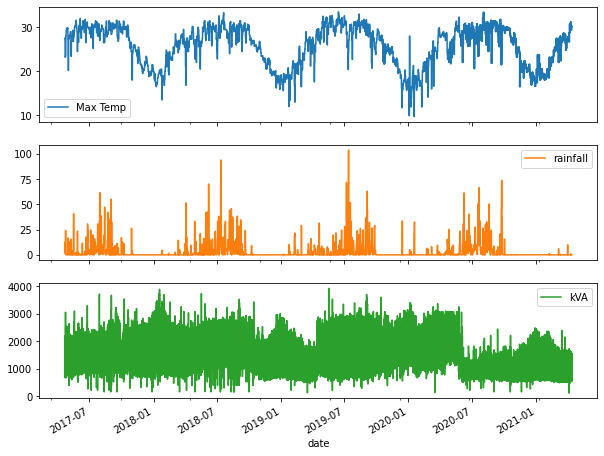

In [17]:
df.set_index('date')[['Max Temp','rainfall','kVA']].plot(subplots = True)

In [18]:
result = df
#result = df.loc[df['Value'] == 0]
new_kva = df['kVA']
new_kva.replace(to_replace = 0, value = new_kva.std(), inplace=True)

In [19]:
df_input = result

In [20]:
df_input = result[['kVA','Max Temp','Week','Hour', 'Min Temp','week-1']]

In [21]:
q3 = df_input['kVA'].quantile(0.75)
iqr = df_input['kVA'].quantile(0.75) - df_input['kVA'].quantile(0.25)
threshold = q3 + 1.5 * iqr

In [22]:
q1 = df_input['kVA'].quantile(0.25)
iqr = df_input['kVA'].quantile(0.75) - df_input['kVA'].quantile(0.25)
thresholdL = q1 - 1 * iqr

In [23]:
iqr,q1

(832.1500000000001, 1166.0)

In [24]:
threshold

3246.375

In [25]:
df_input['kVA'] = df_input['kVA'].clip(upper=threshold)
df_input['kVA'] = df_input['kVA'].clip(lower=thresholdL)

<ipython-input-25-57fd93b5e8a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input['kVA'] = df_input['kVA'].clip(upper=threshold)
<ipython-input-25-57fd93b5e8a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input['kVA'] = df_input['kVA'].clip(lower=thresholdL)


In [26]:
thresholdL

333.8499999999999

In [27]:
df_input

,kVA,Max Temp,Week,Hour,Min Temp,week-1
0,968.000000,27.5,16,0,16.5,770.0
1,798.589713,27.5,16,1,16.5,726.0
2,682.000000,27.5,16,2,16.5,704.0
3,682.000000,27.5,16,3,16.5,704.0
4,682.000000,27.5,16,4,16.5,748.0
...,...,...,...,...,...,...
46523,1496.000000,30.2,15,20,13.0,1331.0
46524,1408.000000,30.2,15,21,13.0,1254.0
46525,1298.000000,30.2,15,22,13.0,1144.0
46526,1210.000000,30.2,15,23,13.0,825.0


In [28]:
df_input.describe()

,kVA,Max Temp,Week,Hour,Min Temp,week-1
count,46528.000000,46528.000000,46528.000000,46528.000000,46528.000000,46528.000000
mean,1588.449201,25.688607,26.696011,11.875000,13.106671,1590.400300
std,575.268169,4.517785,15.104605,6.650964,6.294455,576.434043
min,333.850000,9.700000,1.000000,0.000000,0.000000,110.000000
25%,1166.000000,22.000000,13.000000,6.750000,7.500000,1166.000000
50%,1570.800000,26.950000,27.000000,11.500000,13.600000,1573.000000
75%,1998.150000,29.500000,40.000000,18.000000,19.500000,2002.000000
max,3246.375000,33.500000,53.000000,23.000000,23.500000,3927.000000


In [29]:
new_kva = df_input['kVA']
new_kva.replace(to_replace = 0, value = new_kva.std(), inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [30]:
df_input.describe()

,kVA,Max Temp,Week,Hour,Min Temp,week-1
count,46528.000000,46528.000000,46528.000000,46528.000000,46528.000000,46528.000000
mean,1588.449201,25.688607,26.696011,11.875000,13.106671,1590.400300
std,575.268169,4.517785,15.104605,6.650964,6.294455,576.434043
min,333.850000,9.700000,1.000000,0.000000,0.000000,110.000000
25%,1166.000000,22.000000,13.000000,6.750000,7.500000,1166.000000
50%,1570.800000,26.950000,27.000000,11.500000,13.600000,1573.000000
75%,1998.150000,29.500000,40.000000,18.000000,19.500000,2002.000000
max,3246.375000,33.500000,53.000000,23.000000,23.500000,3927.000000


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


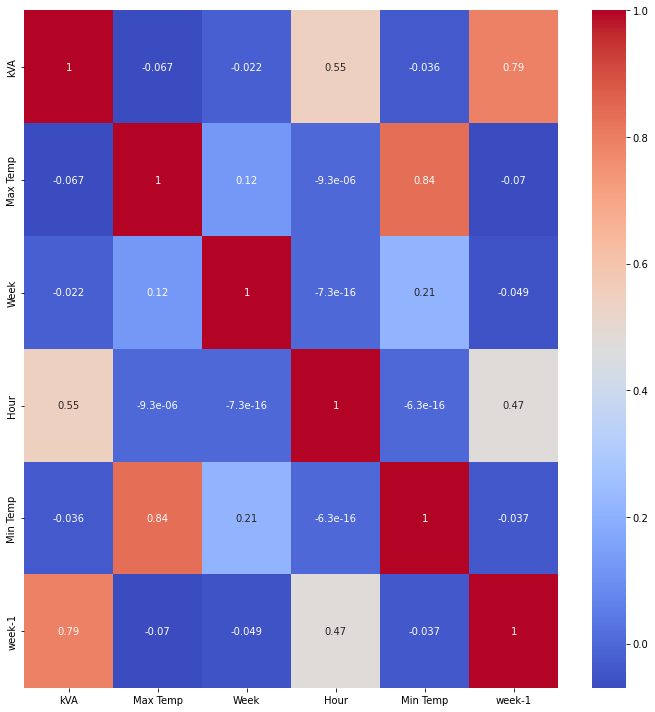

In [31]:
# Create a FacetGrid object with the desired height
g = sns.FacetGrid(df, size = 10)

# Load a sample dataset


# Compute the correlation matrix
corr = df_input.corr()

# Generate a heatmap from the correlation matrix
sns.heatmap(corr, annot=True, cmap="coolwarm")

# Show the plot
plt.show()

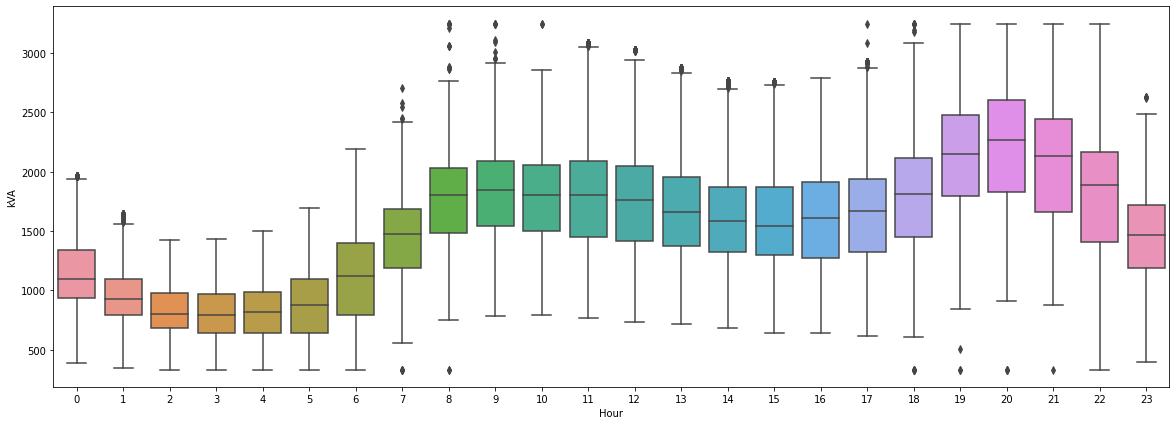

In [32]:
fig = plt.figure(figsize=(20, 7))
sns.boxplot(x="Hour", y="kVA", data=df_input)
plt.xlabel("Hour") # set the font size for the x-axis label
plt.show()

In [33]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_input)

In [34]:
features= data_scaled
target = data_scaled[:,0]

In [35]:
TimeseriesGenerator(features, target , length= 96 , sampling_rate =2 , batch_size=64)[0]

(array([[[0.21773204, 0.74789916, 0.28846154, 0.        , 0.70212766,
          0.17291066],
         [0.11953545, 0.74789916, 0.28846154, 0.08695652, 0.70212766,
          0.1556196 ],
         [0.11953545, 0.74789916, 0.28846154, 0.17391304, 0.70212766,
          0.16714697],
         ...,
         [0.66339345, 0.57983193, 0.28846154, 0.82608696, 0.65106383,
          0.55907781],
         [0.71626853, 0.57983193, 0.28846154, 0.86956522, 0.65106383,
          0.49567723],
         [0.61807195, 0.57983193, 0.28846154, 0.95652174, 0.65106383,
          0.3573487 ]],
 
        [[0.15956591, 0.74789916, 0.28846154, 0.04347826, 0.70212766,
          0.16138329],
         [0.11953545, 0.74789916, 0.28846154, 0.13043478, 0.70212766,
          0.1556196 ],
         [0.1421962 , 0.74789916, 0.28846154, 0.2173913 , 0.70212766,
          0.18443804],
         ...,
         [0.75403645, 0.57983193, 0.28846154, 0.86956522, 0.65106383,
          0.54755043],
         [0.66339345, 0.57983193, 0.288

In [36]:
x_train , x_test , y_train, y_test = train_test_split(features, target, test_size= 0.20 , random_state= 123, shuffle = False)

In [37]:
x_train.shape

(37222, 6)

In [38]:
x_test.shape

(9306, 6)

In [43]:
win_length = 32
batch_size =32
sr = 1
num_features = 6
train_generator = TimeseriesGenerator(x_train , y_train, length = win_length , sampling_rate =sr , batch_size = batch_size)
test_generator = TimeseriesGenerator(x_test , y_test, length = win_length , sampling_rate =sr , batch_size = batch_size)

In [44]:
train_generator[0]

(array([[[0.21773204, 0.74789916, 0.28846154, 0.        , 0.70212766,
          0.17291066],
         [0.15956591, 0.74789916, 0.28846154, 0.04347826, 0.70212766,
          0.16138329],
         [0.11953545, 0.74789916, 0.28846154, 0.08695652, 0.70212766,
          0.1556196 ],
         ...,
         [0.58030403, 0.74789916, 0.28846154, 0.91304348, 0.70212766,
          0.43227666],
         [0.51987537, 0.74789916, 0.28846154, 0.95652174, 0.70212766,
          0.31700288],
         [0.38391087, 0.74789916, 0.28846154, 1.        , 0.70212766,
          0.21325648]],
 
        [[0.15956591, 0.74789916, 0.28846154, 0.04347826, 0.70212766,
          0.16138329],
         [0.11953545, 0.74789916, 0.28846154, 0.08695652, 0.70212766,
          0.1556196 ],
         [0.11953545, 0.74789916, 0.28846154, 0.13043478, 0.70212766,
          0.1556196 ],
         ...,
         [0.51987537, 0.74789916, 0.28846154, 0.95652174, 0.70212766,
          0.31700288],
         [0.38391087, 0.74789916, 0.288

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, input_shape = (win_length, num_features), return_sequences =True)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences= True)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences= False)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))

In [ ]:
from tensorflow.python import losses
early_Stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                  patience =10, 
                                                  mode ='min')
model.compile(loss= tf.losses.MeanSquaredError(), 
              optimizer = tf.optimizers.Adamax(),
                             metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.FalseNegatives()],
              metrics = [tf.metrics.MeanAbsoluteError()] )

history = model.fit_generator(train_generator, epochs = 50,
                              validation_data = test_generator,
                              shuffle = False,
                              callbacks= [early_Stopping])

In [ ]:
model.evaluate_generator(test_generator, verbose =0)

In [ ]:
predictions = model.predict_generator(test_generator)

In [ ]:
predictions.shape[0]

In [ ]:
predictions

In [ ]:
y_test

In [ ]:
x_test

In [ ]:
x_test[:,1:][win_length:]

In [ ]:
df_pred = pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_test[:,1:][win_length:])],axis = 1)

In [ ]:
rev_trans = scaler.inverse_transform(df_pred)

In [ ]:
rev_trans

In [ ]:
df_final = df_input[predictions.shape[0]*-1:]

In [ ]:
df_final.count()

In [ ]:
df_final['App_Pred']= rev_trans[:,0]

In [ ]:
df_final

In [ ]:
fig = plt.figure(figsize=(20, 7))
df_final[['kVA','App_Pred']].plot(figsize=(20, 7))

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
df_final.to_csv('BiLSTM3hiddenlayerMax.csv', index=False)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error
rmse=math.sqrt(mean_squared_error(df_final['kVA'], df_final['App_Pred']))
# calculate mean absolute error
mae = mean_absolute_error(df_final['kVA'], df_final['App_Pred'])
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("MAPE:", mean_absolute_percentage_error(df_final['kVA'], df_final['App_Pred'])*100, "%")